In [1]:
from psession import parse, info, gen_annotation

In [2]:
session_info = info('./data/20250827 Tiana ECoG-L.pssession')

In [3]:
session_info

[{'title': '20250827 Tiana ECoG-L N3 TOP',
  'date': '2025-08-27T16:49:15.444776',
  'measurement_id': 'a08f5f23',
  'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N3 BOT',
  'date': '2025-08-27T16:55:50.822776',
  'measurement_id': '3854f11a',
  'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N4 TOP',
  'date': '2025-08-27T17:02:15.093624',
  'measurement_id': '68dcd6a7',
  'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N4 BOT',
  'date': '2025-08-27T17:05:55.436680',
  'measurement_id': '0efbff75',
  'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N5 TOP',
  'date': '2025-08-27T17:12:27.571624',
  'measurement_id': '446fb21e',
  'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N5 BOT',
  'date': '2025-08-27T17:16:06.568864',
  'measurement_id': 'b00775dc',
  'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N6 TOP',
  'date': '2025-08-27T17:21:27.101400',
  'measurement_id': '7d57ff26',
  'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L 

In [4]:
import pandas as pd

damage = pd.read_csv("./data/parsed_electrodes.csv")

damage = damage.rename(
    columns=lambda c: (
        c[1:] if c.startswith("e") and c[1:].isdigit() else
        "32" if c == "eRef" else
        c
    )
)

damage["Device"] = damage["Device"].str.replace(
    r"^ECoG(\d+)$",
    lambda m: f"N{int(m.group(1)):02d}",
    regex=True,
)

print(damage.head())

  Device  1  2  3  4   5  6  7    8    9  ...  22  23  24  25  26  27  28  29  \
0    N01  0  0  0  0  80  0  0  100  100  ...   0   0   0   0   0   0   0   0   
1    N02  0  0  0  0   0  0  0    0    0  ...   0   0   0   0   0   0   0   0   
2    N03  0  0  0  0   0  0  0    0  100  ...   0   0   0   0   0   0   0   0   
3    N04  0  0  0  0   0  0  0    0    0  ...   0   0   0   0   0   0   0   0   
4    N05  0  0  0  0   0  0  0    0    0  ...   0   0   0   0  50   0   0   0   

   32                                    notes  
0   0                                      NaN  
1   0                                      NaN  
2   0                       full of air bubles  
3   0  air bubbles bewteen the two PDMS layers  
4   0                                      NaN  

[5 rows x 32 columns]


In [5]:
def parse_title(row):
    try:
        title = row.get("title")
        parts = title.split(" ")
        data, animal, implant, device_n, block = parts

        device_int = int(device_n[1:])
        two_digit_dev = f"N{device_int:02d}"

        return {
            "device": two_digit_dev,
            "block": block,
        }
    except Exception as e:
        print(f"Error annotating row {row}: {e}")
        return {}

def add_damage(row):
    damage_v = 0
    try:
        dev = row["device"]
        ch = row["channel"]
        damage_v = damage.loc[damage["Device"] == dev, str(ch)].iloc[0]
    except:
        damage_v = 0
        
    return {"damage": damage_v}
    
enrichments = [
    (
        lambda row: True, 
        parse_title
    ),
    (
        lambda row: row.get("block") == "BOT",
        lambda row: {"channel": row.get("channel", 0) + 16},
    ),
    (
        lambda row: True,
        add_damage,
    ),
    (
        lambda row: row["channel"] in [17, 24, 29], 
        lambda row: {"ch_type": "test"}
    ),
    (
        lambda row: pd.isna(row.get("ch_type")), 
        lambda row: {"ch_type": "ok"}
    ),
]

In [6]:
opts={"presort": ["device", "channel"]}

In [7]:
eis, cv, lsv = parse(
    './data/20250827 Tiana ECoG-L.pssession', 
    enrichments=enrichments,
    opts=opts
)

Parsed 20 EIS measurements


In [8]:
eis[:10]

,title,date,measurement_id,channel,sweep_id,idc,frequency,zre,zim,z,phase,c,cre,cim,device,block,damage,ch_type
0,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,1,e45ceb7f,-11920.928955,100000.0,1025.105073,319.792715,1073.828567,17.325881,4.976816e-09,4.413862e-10,1.414877e-09,N01,TOP,0.0,ok
1,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,1,e45ceb7f,-691.413879,10000.0,1941.100522,1200.403246,2282.288147,31.733216,1.325846e-08,3.667806e-09,5.930990e-09,N01,TOP,0.0,ok
2,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,1,e45ceb7f,-71.763992,1000.0,3948.419593,1267.275624,4146.806578,17.794432,1.255883e-07,1.172907e-08,3.654398e-08,N01,TOP,0.0,ok
3,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,1,e45ceb7f,-6.597090,100.0,5370.457938,2092.971674,5763.883143,21.291828,7.604257e-07,1.002659e-07,2.572771e-07,N01,TOP,0.0,ok
4,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,1,e45ceb7f,-6.082058,10.0,9003.971524,6722.751811,11236.854325,36.746598,2.367408e-06,8.473790e-07,1.134919e-06,N01,TOP,0.0,ok
5,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,1,e45ceb7f,-0.558116,1.0,22852.947378,24559.023436,33547.024249,47.060847,6.480508e-06,3.473147e-06,3.231873e-06,N01,TOP,0.0,ok
6,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,2,6a56eefb,16689.300537,100000.0,2310.965756,1426.109344,2715.575553,31.678958,1.116008e-09,3.077862e-10,4.987580e-10,N01,TOP,0.0,ok
7,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,2,6a56eefb,23.841858,10000.0,6385.181953,6237.228160,8926.004912,44.328437,2.551693e-09,1.245941e-09,1.275496e-09,N01,TOP,0.0,ok
8,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,2,6a56eefb,-11.205673,1000.0,17631.948996,6722.174415,18869.903399,20.869330,2.367611e-08,3.004627e-09,7.880996e-09,N01,TOP,0.0,ok
9,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,2,6a56eefb,-1.204014,100.0,24729.379527,10709.878007,26948.909045,23.416624,1.486057e-07,2.347050e-08,5.419397e-08,N01,TOP,0.0,ok


In [9]:
eis[(eis["device"] == "N01") & (eis["channel"] == 5)]

,title,date,measurement_id,channel,sweep_id,idc,frequency,zre,zim,z,phase,c,cre,cim,device,block,damage,ch_type
24,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,5,328eda99,1.668930e+04,100000.0,8.366861e+03,3.494307e+04,3.593080e+04,76.534465,4.554693e-11,4.307719e-11,1.031452e-11,N01,TOP,80.0,ok
25,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,5,328eda99,1.668930e+02,10000.0,1.733571e+05,3.713401e+05,4.098124e+05,64.974861,4.285961e-11,3.519021e-11,1.642827e-11,N01,TOP,80.0,ok
26,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,5,328eda99,1.668930e+00,1000.0,-1.561479e+06,2.291264e+06,2.772744e+06,124.274141,6.946163e-11,4.743247e-11,-3.232488e-11,N01,TOP,80.0,ok
27,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,5,328eda99,1.668930e-02,100.0,1.821942e+07,7.953883e+06,1.987992e+07,23.584197,2.000972e-10,3.203096e-11,7.337112e-11,N01,TOP,80.0,ok
28,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,5,328eda99,2.145767e-04,10.0,-2.126073e+07,2.150945e+08,2.161427e+08,95.644988,7.399304e-11,7.327712e-11,-7.242978e-12,N01,TOP,80.0,ok
29,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,5,328eda99,-2.384186e-07,1.0,4.505517e+08,3.007131e+09,3.040696e+09,81.478885,5.292585e-11,5.176384e-11,7.755661e-12,N01,TOP,80.0,ok


In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import numpy as np

figsize=(12, 7)

In [11]:
df = eis

In [12]:
df = df[df["ch_type"] == "ok"]

In [13]:
top_off = opts.get("blocks_offset", {}).get("TOP", 0)
df[(df['title'] == '20250827 Tiana ECoG-L N1 TOP') & (df['channel'] == top_off + 5)]

,title,date,measurement_id,channel,sweep_id,idc,frequency,zre,zim,z,phase,c,cre,cim,device,block,damage,ch_type
24,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,5,328eda99,1.668930e+04,100000.0,8.366861e+03,3.494307e+04,3.593080e+04,76.534465,4.554693e-11,4.307719e-11,1.031452e-11,N01,TOP,80.0,ok
25,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,5,328eda99,1.668930e+02,10000.0,1.733571e+05,3.713401e+05,4.098124e+05,64.974861,4.285961e-11,3.519021e-11,1.642827e-11,N01,TOP,80.0,ok
26,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,5,328eda99,1.668930e+00,1000.0,-1.561479e+06,2.291264e+06,2.772744e+06,124.274141,6.946163e-11,4.743247e-11,-3.232488e-11,N01,TOP,80.0,ok
27,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,5,328eda99,1.668930e-02,100.0,1.821942e+07,7.953883e+06,1.987992e+07,23.584197,2.000972e-10,3.203096e-11,7.337112e-11,N01,TOP,80.0,ok
28,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,5,328eda99,2.145767e-04,10.0,-2.126073e+07,2.150945e+08,2.161427e+08,95.644988,7.399304e-11,7.327712e-11,-7.242978e-12,N01,TOP,80.0,ok
29,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,5,328eda99,-2.384186e-07,1.0,4.505517e+08,3.007131e+09,3.040696e+09,81.478885,5.292585e-11,5.176384e-11,7.755661e-12,N01,TOP,80.0,ok


In [14]:
mask = (df['title'] == '20250827 Tiana ECoG-L N1 TOP') & (df['channel'] == top_off + 5)
df_new = df[~mask]
df = df_new

In [15]:
unique_ids = np.unique(df['device'])
cmap = plt.get_cmap("tab20", len(unique_ids)) 
colors = {mid: cmap(i) for i, mid in enumerate(unique_ids)}

legend_handles = [
    Line2D([0], [0], color=col, label=grp)
    for grp, col in colors.items()
]

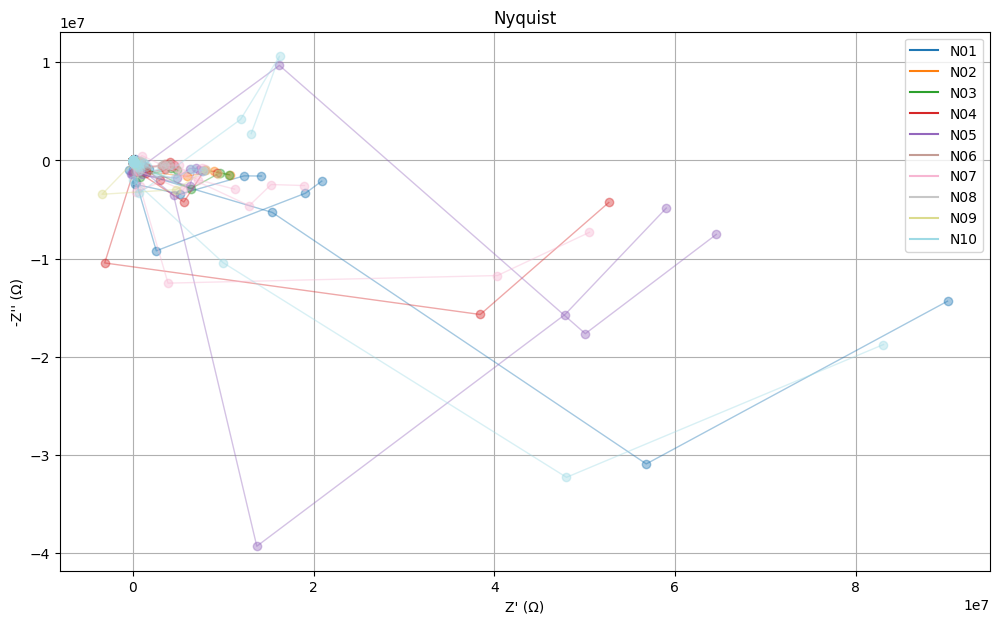

In [16]:
plt.figure(figsize=figsize)
seen = set()
for sid, g in df.groupby(["device", "channel", "sweep_id"]):
    g = g.sort_values("frequency", ascending=False)
    mid = g["device"].iloc[0]
    plt.plot(g["zre"], -g["zim"], "o-", color=colors[mid], linewidth=1, alpha=0.4)
    seen.add(mid)

plt.xlabel("Z' (Ω)")
plt.ylabel("-Z'' (Ω)")
plt.title("Nyquist")
plt.legend(handles=legend_handles)
plt.grid(True)

[devN01] channel order:       [8, 12, 23, 26]
[devN01] channel order (1Hz): [12, 8, 23, 26]


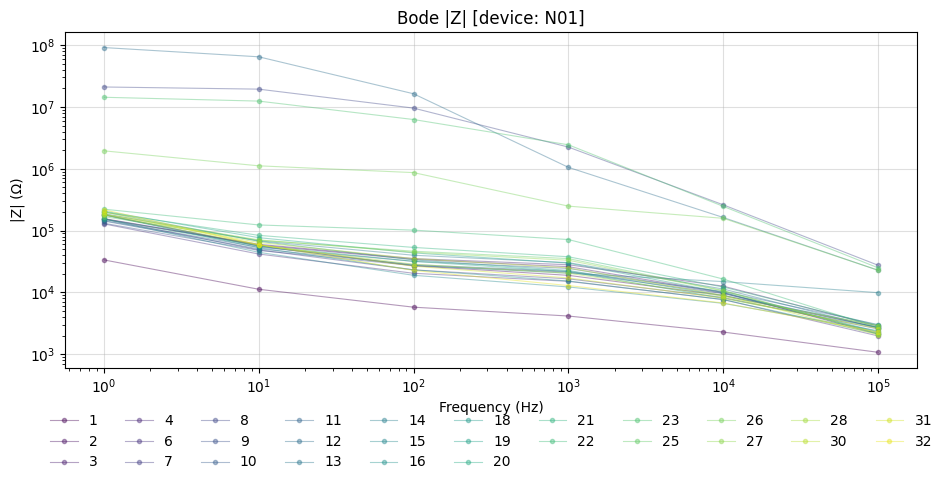

In [17]:
import pandas as pd

def median_rank_channels(df, frequency=None):
    if "z" not in df.columns:
        raise KeyError("column 'z' is required")

    if frequency is not None:
        sub = df[np.isclose(df["frequency"], frequency)]
        if sub.empty:
            raise ValueError(f"no rows with frequency={frequency}")
        ranks = sub.groupby("channel")["z"].median().sort_values().reset_index(name="score")
        order = ranks["channel"].tolist()
    else:
        cf = df.groupby(["channel","frequency"], as_index=False)["z"].median()
        cf["rank"] = cf.groupby("frequency")["z"].rank(method="average", ascending=True)
        ranks = (cf.groupby("channel")["rank"]
                   .median()
                   .sort_values()
                   .reset_index(name="score"))
        order = ranks["channel"].tolist()

    return order, ranks


def plot_device(data_df, device, figsize=figsize):
    df_nX = data_df[data_df['device'].isin([device])]
    
    order, ranks = median_rank_channels(df_nX)
    print(f"[dev{device}] channel order:      ", order[::-1][:4])
    order, ranks = median_rank_channels(df_nX, frequency=1.0)
    print(f"[dev{device}] channel order (1Hz):", order[::-1][:4])

    unique_ids_nX = np.unique(df_nX['channel'])
    cmap = plt.get_cmap("viridis")
    colors_nX = {mid: cmap(i / len(unique_ids_nX)) for i, mid in enumerate(unique_ids_nX)}

    plt.figure(figsize=figsize)
    for sid, g in df_nX.groupby(["device", "channel", "sweep_id"]):
        g = g.sort_values("frequency", ascending=False)
        mag = g["z"].to_numpy() if "z" in g.columns else np.hypot(g["zre"], g["zim"])
        plt.loglog(g["frequency"], mag, ".-", color=colors_nX[g["channel"].iloc[0]], linewidth=0.8, alpha=0.4, label=sid[1])

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("|Z| (Ω)")
    plt.title(f"Bode |Z| [device: {device}]")
    plt.grid(True, alpha=0.4)

    plt.legend(
        bbox_to_anchor=(0.5, -0.1),
        loc="upper center",
        ncol=11,
        frameon=False
    )
    plt.tight_layout()
    
plot_device(df, "N01", figsize=(10, 5))

[devN02] channel order:       [23, 9, 4, 7]
[devN02] channel order (1Hz): [23, 9, 4, 7]
[devN03] channel order:       [8, 22, 4, 26]
[devN03] channel order (1Hz): [8, 22, 4, 2]
[devN04] channel order:       [28, 4, 12, 20]
[devN04] channel order (1Hz): [28, 4, 12, 20]
[devN05] channel order:       [13, 12, 4, 5]
[devN05] channel order (1Hz): [12, 13, 4, 5]
[devN06] channel order:       [20, 27, 2, 18]
[devN06] channel order (1Hz): [20, 2, 27, 18]
[devN07] channel order:       [1, 8, 9, 22]
[devN07] channel order (1Hz): [1, 8, 9, 22]
[devN08] channel order:       [3, 5, 32, 15]
[devN08] channel order (1Hz): [3, 5, 32, 14]
[devN09] channel order:       [23, 12, 16, 2]
[devN09] channel order (1Hz): [23, 2, 16, 12]
[devN10] channel order:       [14, 12, 5, 26]
[devN10] channel order (1Hz): [14, 12, 5, 26]


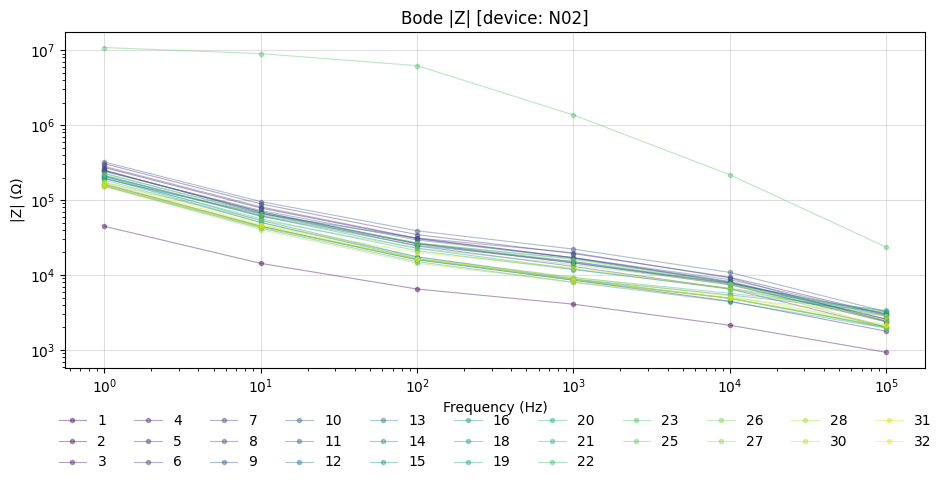

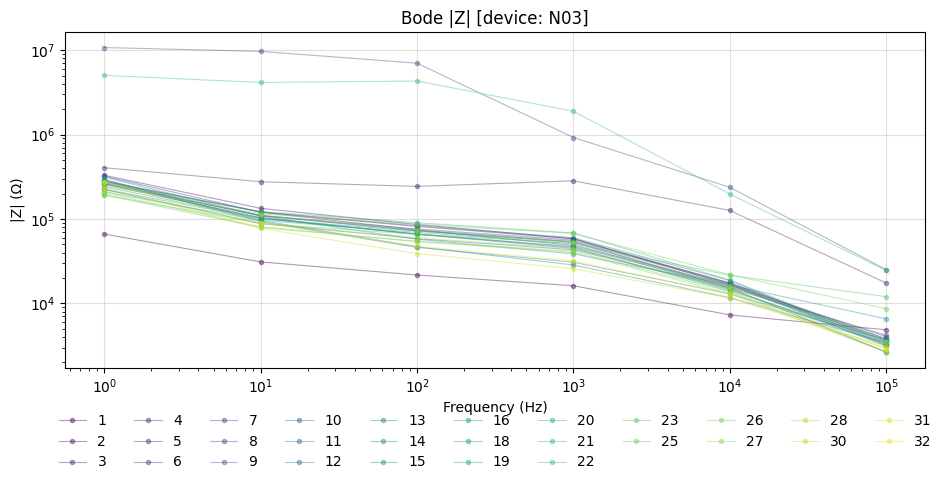

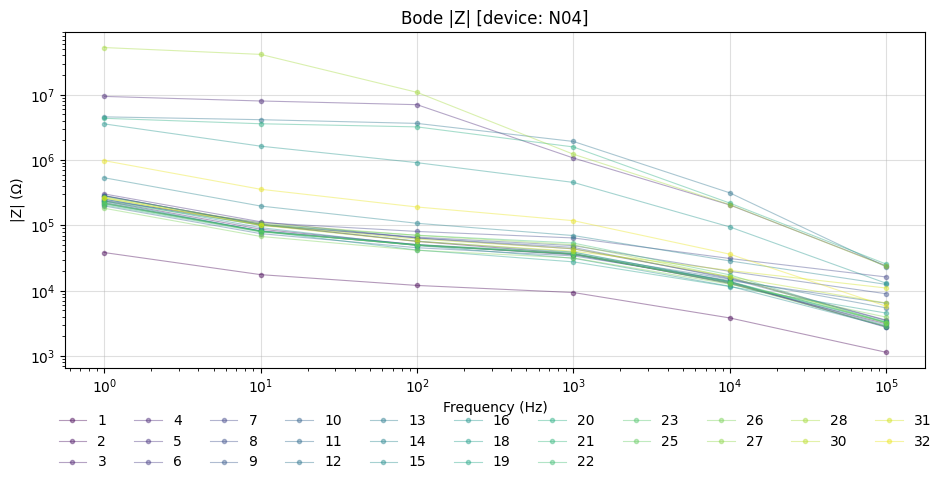

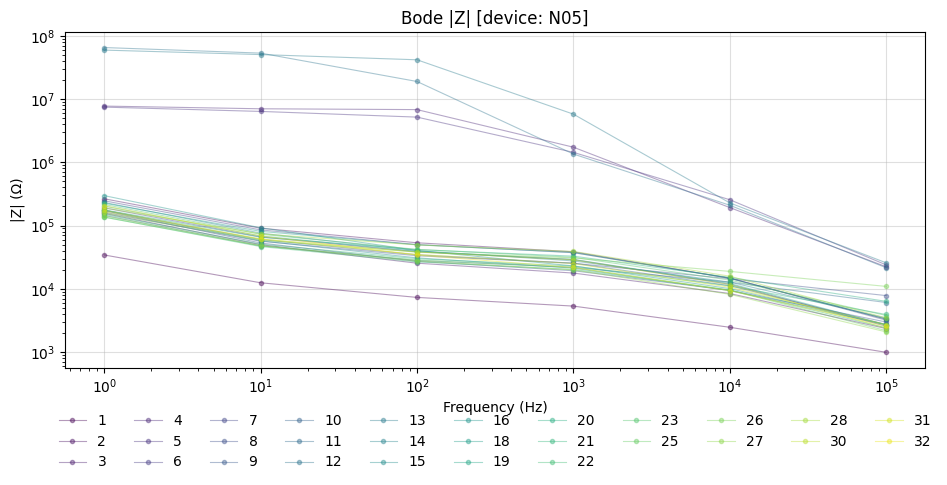

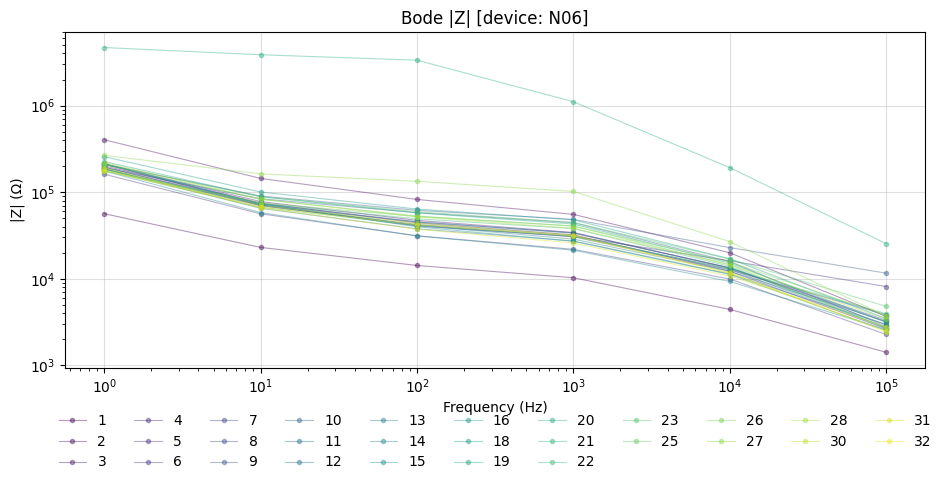

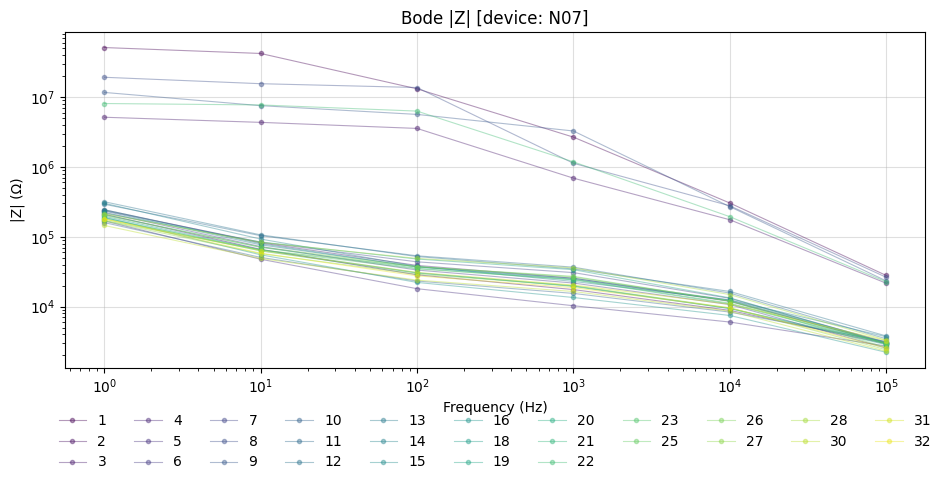

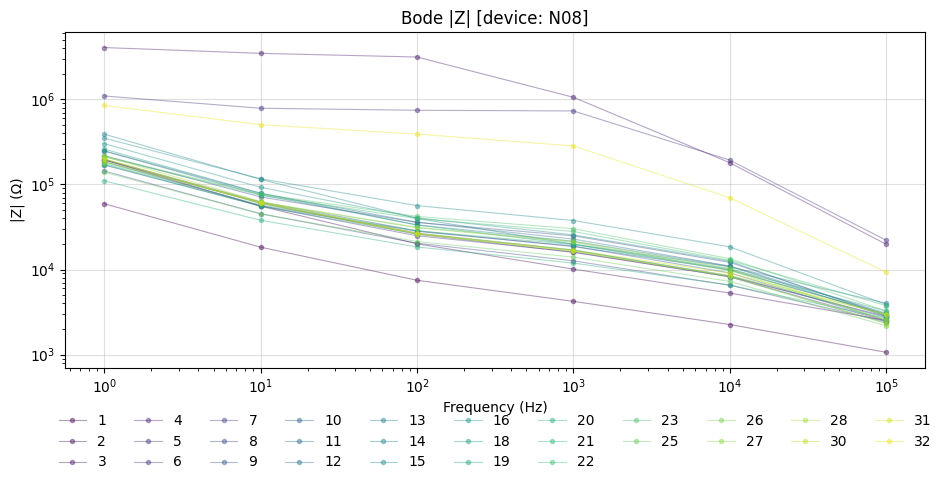

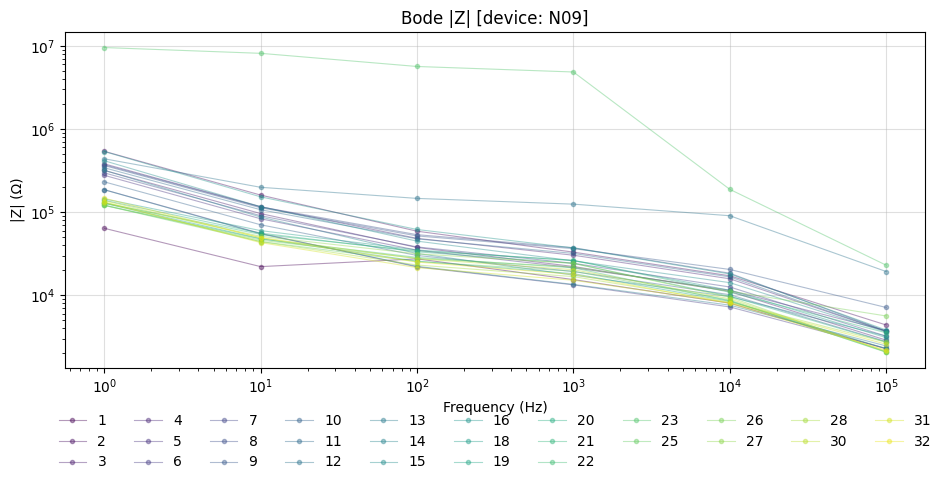

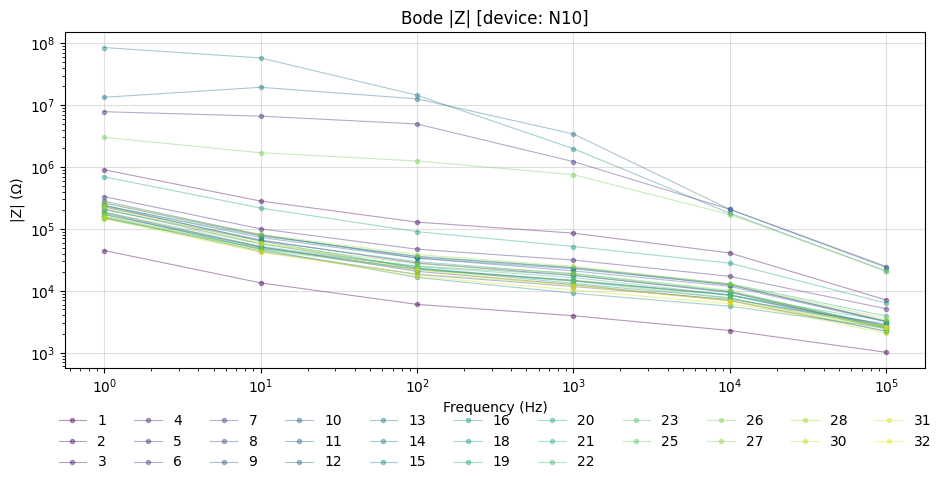

In [18]:
plot_device(df, "N02", figsize=(10, 5))
plot_device(df, "N03", figsize=(10, 5))
plot_device(df, "N04", figsize=(10, 5))
plot_device(df, "N05", figsize=(10, 5))
plot_device(df, "N06", figsize=(10, 5))
plot_device(df, "N07", figsize=(10, 5))
plot_device(df, "N08", figsize=(10, 5))
plot_device(df, "N09", figsize=(10, 5))
plot_device(df, "N10", figsize=(10, 5))

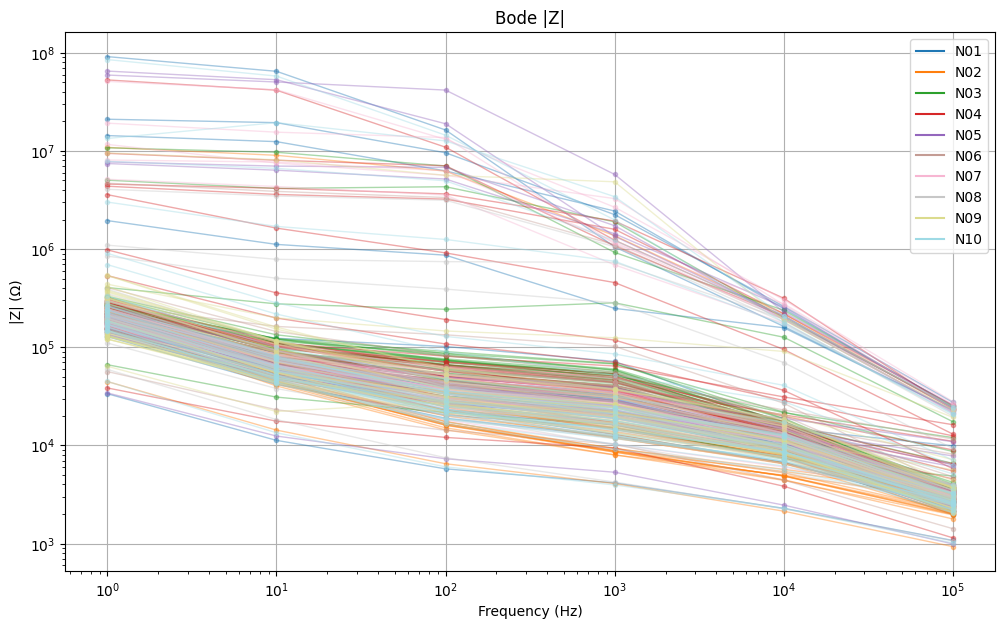

In [19]:
plt.figure(figsize=figsize)
for sid, g in df.groupby(["device", "channel", "sweep_id"]):
    g = g.sort_values("frequency", ascending=False)
    mag = g["z"].to_numpy() if "z" in g.columns else np.hypot(g["zre"], g["zim"])
    mid = g["device"].iloc[0]
    plt.loglog(g["frequency"], mag, ".-", color=colors[mid], linewidth=1, alpha=0.4)

plt.xlabel("Frequency (Hz)")
plt.ylabel("|Z| (Ω)")
plt.title("Bode |Z|")
plt.legend(handles=legend_handles)
plt.grid(True)

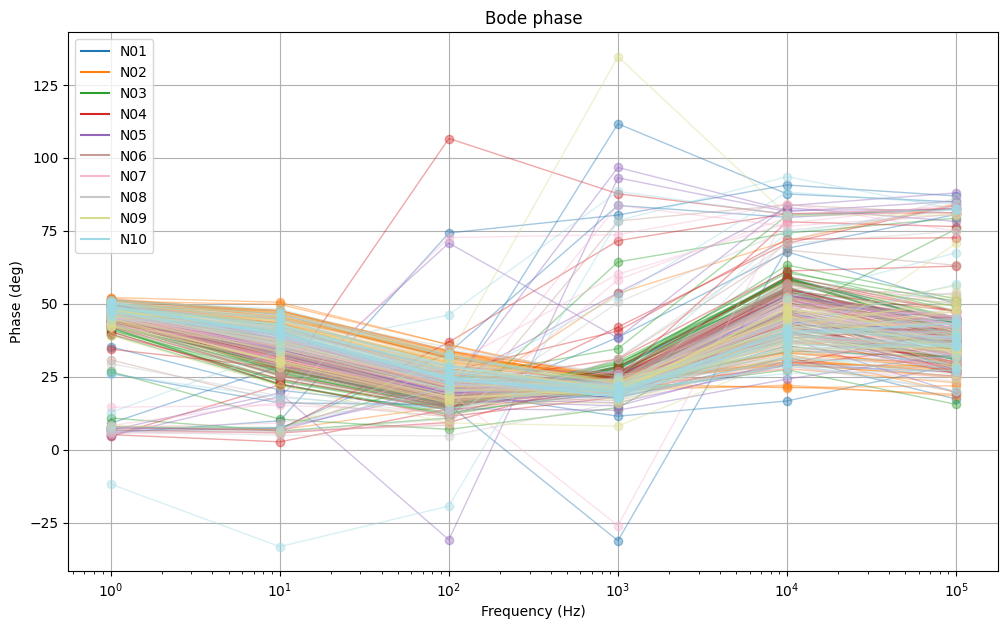

In [20]:
plt.figure(figsize=figsize)
for sid, g in df.groupby(["device", "channel", "sweep_id"]):
    g = g.sort_values("frequency", ascending=False)
    phase = g["phase"].to_numpy() if "phase" in g.columns else np.degrees(np.arctan2(g["zim"], g["zre"]))
    mid = g["device"].iloc[0]
    plt.semilogx(g["frequency"], phase, "o-", color=colors[mid], linewidth=1, alpha=0.4)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (deg)")
plt.title("Bode phase")
plt.grid(True)
plt.legend(handles=legend_handles)
plt.show()

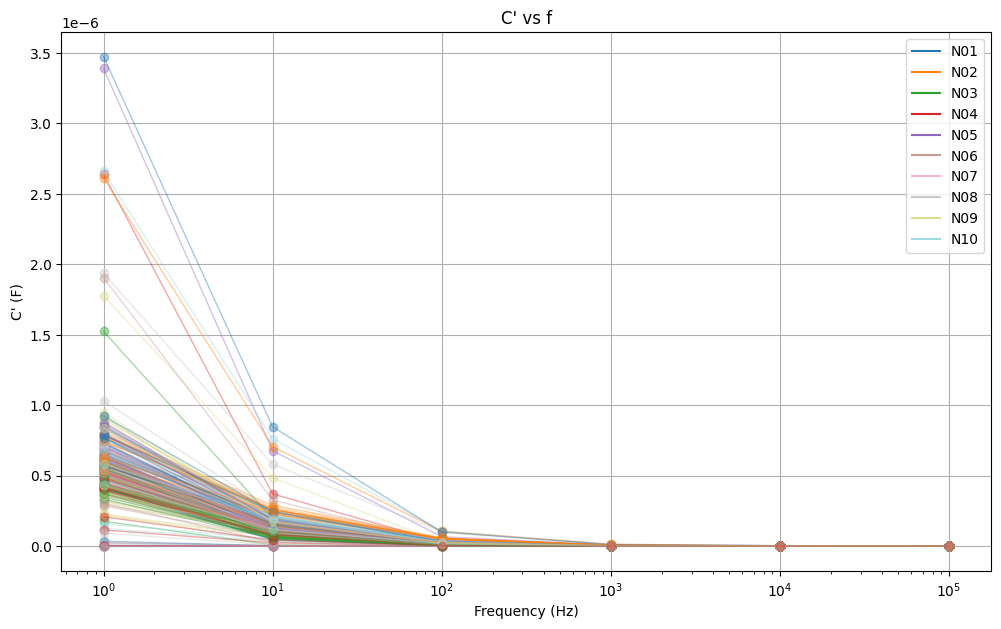

In [21]:
plt.figure(figsize=figsize)
for sid, g in df.groupby(["sweep_id", "channel"]):
    g = g.sort_values("frequency", ascending=False)
    mid = g["device"].iloc[0]
    plt.semilogx(g["frequency"], g["cre"], "o-", color=colors[mid], linewidth=1, alpha=0.4)
    
plt.xlabel("Frequency (Hz)")
plt.ylabel("C' (F)"); plt.title("C' vs f")
plt.legend(handles=legend_handles)
plt.grid(True)

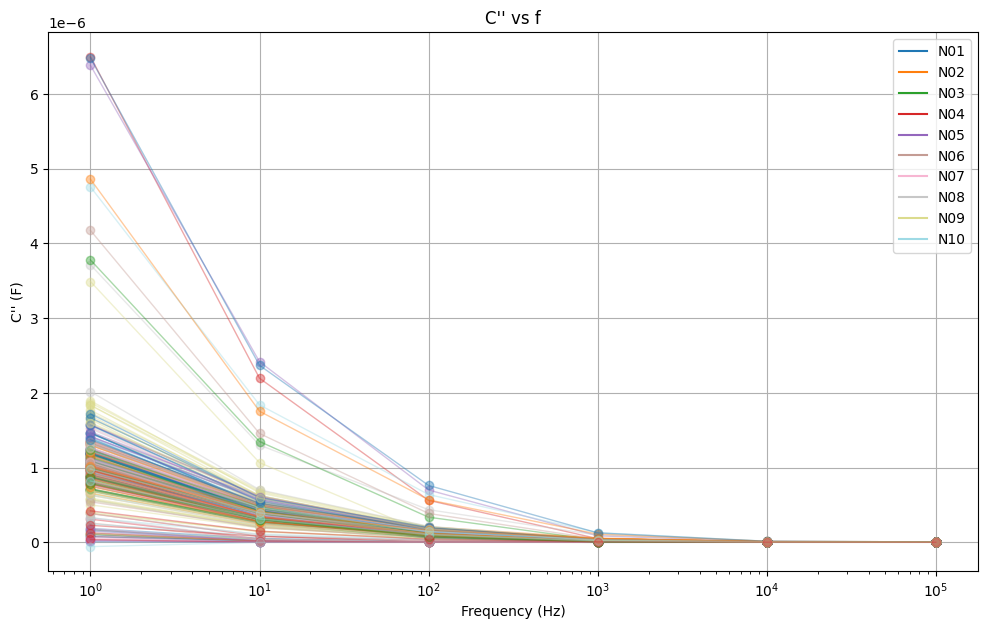

In [22]:
plt.figure(figsize=figsize)
for sid, g in df.groupby(["sweep_id", "channel"]):
    g = g.sort_values("frequency", ascending=False)
    c_plot = g["c"]          # or: -g["c"]
    mid = g["device"].iloc[0]
    plt.semilogx(g["frequency"], c_plot, "o-", color=colors[mid], linewidth=1, alpha=0.4)
    
plt.xlabel("Frequency (Hz)")
plt.ylabel("C'' (F)"); plt.title("C'' vs f")
plt.legend(handles=legend_handles)
plt.grid(True)

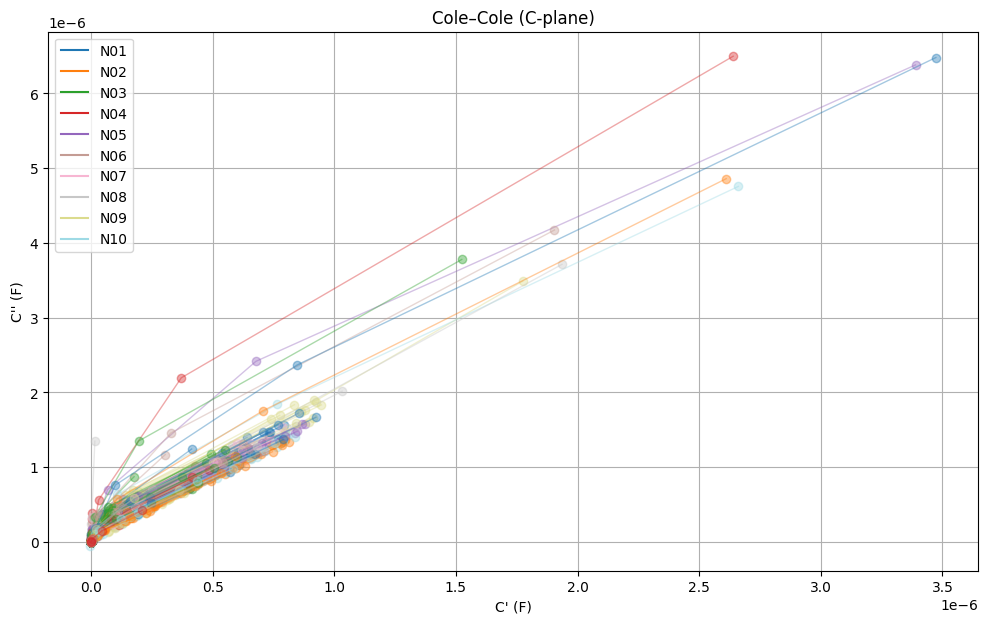

In [23]:
plt.figure(figsize=figsize)

for sid, g in df.groupby(["sweep_id", "channel"]):
    mid = g["device"].iloc[0]
    plt.plot(g["cre"], g["c"], "o-", color=colors[mid], linewidth=1, alpha=0.4)

plt.xlabel("C' (F)")
plt.ylabel("C'' (F)")
plt.title("Cole–Cole (C-plane)")
plt.legend(handles=legend_handles)
plt.grid(True)

In [24]:
base = df.groupby(["device","channel","frequency"], as_index=False)["z"].mean()

summary = (base.groupby(["channel","frequency"])["z"]
               .agg(["mean","std","var","min","max"])
               .reset_index())

In [25]:
v = (base
     .groupby(["channel","frequency"])["z"]
     .var(ddof=1)               # variance across devices
     .reset_index(name="var_z"))


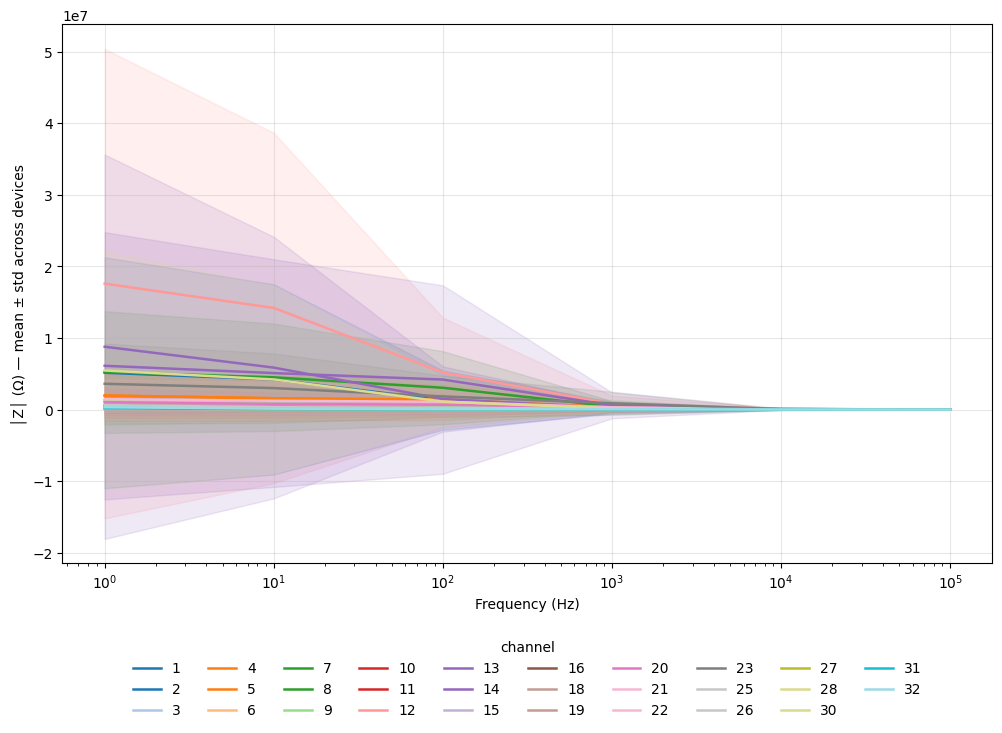

In [26]:
channels = summary["channel"].unique()
cmap = plt.get_cmap("tab20")
colors = {c: cmap(i/len(channels)) for i,c in enumerate(channels)}

plt.figure(figsize=figsize)
for c in channels:
    s = summary[summary["channel"]==c].sort_values("frequency")
    f = s["frequency"].to_numpy()
    m = s["mean"].to_numpy()
    sdev = s["std"].to_numpy()
    plt.semilogx(f, m, lw=1.8, color=colors[c], label=str(c))
    plt.fill_between(f, m - sdev, m + sdev, alpha=0.15, color=colors[c])

    plt.xlabel("Frequency (Hz)")
plt.ylabel("│Z│ (Ω) — mean ± std across devices")
plt.grid(True, alpha=0.3)

plt.legend(title="channel", bbox_to_anchor=(0.5,-0.12), loc="upper center",
           ncol=min(10, len(channels)), frameon=False)


In [27]:
summary_dev = (base[base['device'].isin(['N06', 'N08', 'N09'])]
               .groupby(["device","frequency"])["z"]
               .agg(mean="mean", std="std", n="count")
               .reset_index())

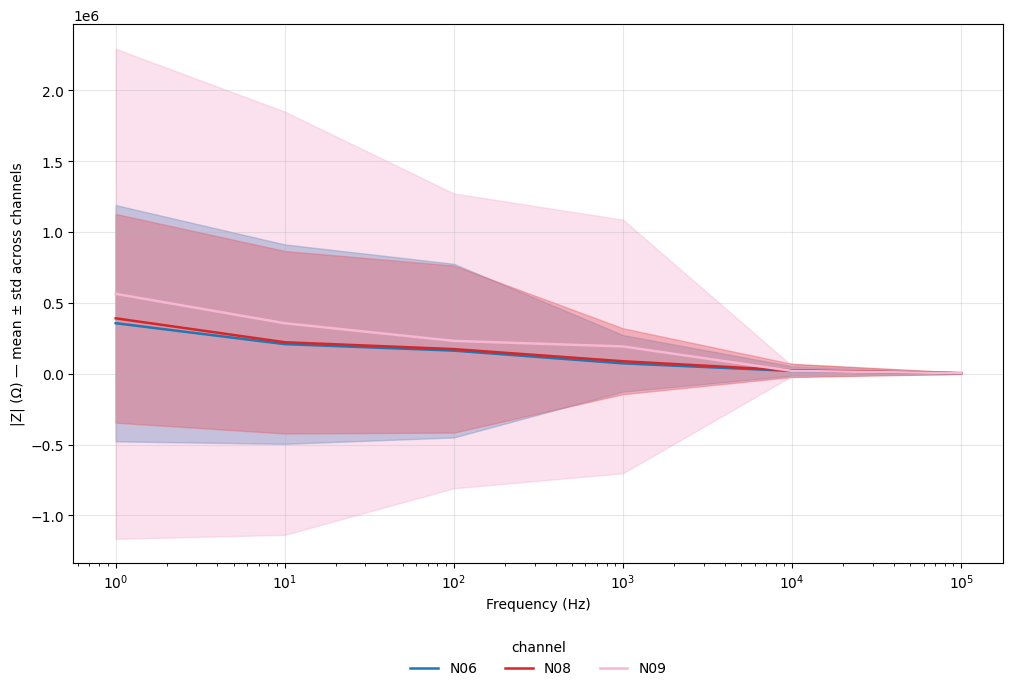

In [28]:
devices = summary_dev["device"].unique()
cmap = plt.get_cmap("tab20")
colors = {d: cmap(i/len(devices)) for i,d in enumerate(devices)}

plt.figure(figsize=figsize)
for d in devices:
    s = summary_dev[summary_dev["device"]==d].sort_values("frequency")
    f = s["frequency"].to_numpy()
    m = s["mean"].to_numpy()
    sdev = s["std"].to_numpy()
    plt.semilogx(f, m, lw=1.8, color=colors[d], label=str(d))
    plt.fill_between(f, m - sdev, m + sdev, alpha=0.4, color=colors[d])
plt.xlabel("Frequency (Hz)")
plt.ylabel("|Z| (Ω) — mean ± std across channels")
plt.grid(True, alpha=0.3)

plt.legend(title="channel", bbox_to_anchor=(0.5,-0.12), loc="upper center",
           ncol=min(10, len(channels)), frameon=False)

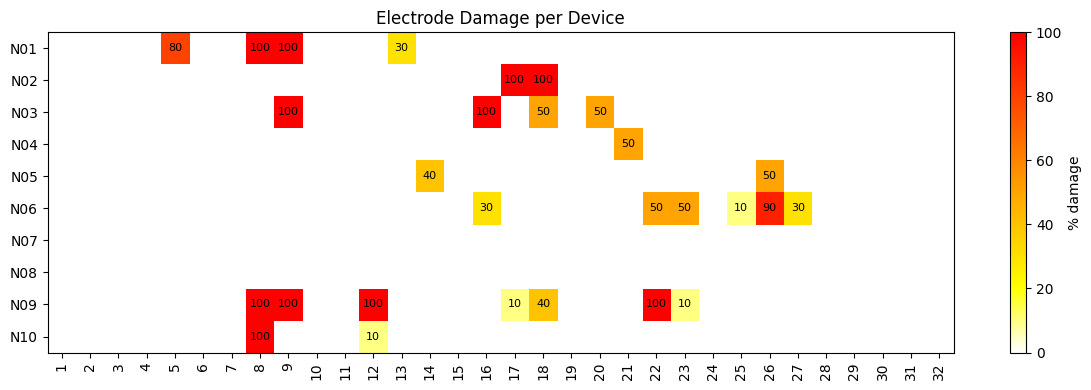

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

eis = eis.copy()
eis["channel"] = eis["channel"].astype(int)
eis["damage"] = pd.to_numeric(eis["damage"], errors="coerce")

# if duplicates exist, aggregate them
mat = eis.pivot_table(
    index="device",
    columns="channel",
    values="damage",
    aggfunc="first",      # or "max"/"mean" — your call
    fill_value=0,
)

# plot (same as before)
cmap = LinearSegmentedColormap.from_list("wyorr", [
    (0.0, "white"), (0.2, "yellow"), (0.5, "orange"), (1.0, "red")
])

fig, ax = plt.subplots(figsize=(12, 4))
im = ax.imshow(mat.to_numpy(), aspect="auto", cmap=cmap, vmin=0, vmax=100, interpolation="nearest")
ax.set_yticks(range(mat.shape[0])); ax.set_yticklabels(mat.index)
ax.set_xticks(range(mat.shape[1])); ax.set_xticklabels(mat.columns.astype(str), rotation=90)

a = mat.to_numpy()
for i, j in np.argwhere(a > 0):
    ax.text(j, i, int(a[i, j]), ha="center", va="center", fontsize=8, color="black")

fig.colorbar(im, ax=ax).set_label("% damage")
ax.set_title("Electrode Damage per Device")
plt.tight_layout(); plt.show()

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_eis_heatmap_across(
    df, *,
    freq_col="freq",
    val_col="impedance",
    device_col="device",
    channel_col="channel",
    damage_col="damage",
    n_freq=200,
    sort_desc=True,
):
    d = df.copy()
    d[channel_col] = d[channel_col].astype(int)
    d[damage_col]  = pd.to_numeric(d[damage_col], errors="coerce")
    d = d.dropna(subset=[freq_col, val_col])

    # sort (device,channel) by damage (use max per pair)
    pairs = (d.groupby([device_col, channel_col], as_index=False)[damage_col]
               .max()
               .sort_values(damage_col, ascending=not sort_desc))

    if pairs.empty:
        raise ValueError("No (device, channel) pairs to plot.")

    fmin, fmax = d[freq_col].min(), d[freq_col].max()
    fgrid = np.logspace(np.log10(fmin), np.log10(fmax), n_freq)

    rows, labels = [], []
    for dev, ch, dmg in pairs[[device_col, channel_col, damage_col]].itertuples(index=False):
        g = d[(d[device_col] == dev) & (d[channel_col] == ch)].sort_values(freq_col)
        x = g[freq_col].to_numpy()
        y = g[val_col].to_numpy()
        if x.size < 2: 
            continue

        # Bode magnitude (dB)
        y_db = np.where(y > 0, 20*np.log10(y), np.nan)

        z = np.full_like(fgrid, np.nan, dtype=float)
        m = (fgrid >= x.min()) & (fgrid <= x.max())
        if m.any():
            z[m] = np.interp(np.log10(fgrid[m]), np.log10(x), y_db)
            rows.append(z)
            label = f"{dev}:{ch}" + (f" ({int(dmg)}%)" if pd.notna(dmg) else "")
            labels.append(label)

    if not rows:
        raise ValueError("No spectra after interpolation.")

    M = np.vstack(rows)
    vmin, vmax = np.nanpercentile(M, [5, 95])

    fig_h = max(3, 0.03 * len(labels))
    fig, ax = plt.subplots(figsize=(12, fig_h))
    extent = [np.log10(fgrid[0]), np.log10(fgrid[-1]), -0.5, len(labels) - 0.5]
    im = ax.imshow(M, aspect="auto", origin="upper", extent=extent,
                   cmap="viridis", vmin=vmin, vmax=vmax)

    kmin, kmax = int(np.floor(np.log10(fmin))), int(np.ceil(np.log10(fmax)))
    xticks = [10**k for k in range(kmin, kmax + 1)]
    ax.set_xticks(np.log10(xticks))
    ax.set_xticklabels([f"{v:g}" for v in xticks])
    ax.set_xlabel("Frequency (Hz, log)")
    # ax.set_yticks(range(len(labels)))
    # ax.set_yticklabels(labels)
    ax.set_ylabel("device:channel (damage)")
    fig.colorbar(im, ax=ax).set_label("20·log10(|Z|) [dBΩ]")
    ax.set_title("EIS spectra heatmap — sorted by damage")
    plt.tight_layout(); plt.show()


def plot_bode_by_damage_bins(
    df, *,
    freq_col="freq",
    val_col="impedance",
    damage_col="damage",
    bins=(0, 1, 20, 50, 101),
    labels=("0", "1–19", "20–49", "50+"),
    n_freq=200,
):
    d = df.copy()
    d[damage_col] = pd.to_numeric(d[damage_col], errors="coerce")
    d = d.dropna(subset=[freq_col, val_col, damage_col])
    d["bin"] = pd.cut(d[damage_col], bins=bins, labels=labels, include_lowest=True, right=False)
    d = d.dropna(subset=["bin"])

    fmin, fmax = d[freq_col].min(), d[freq_col].max()
    fgrid = np.logspace(np.log10(fmin), np.log10(fmax), n_freq)

    plt.figure(figsize=(8, 5))
    for b in d["bin"].cat.categories:
        g = d[d["bin"] == b]
        if g.empty:
            continue
        agg = g.groupby(freq_col, as_index=True)[val_col].median().sort_index()
        x = agg.index.to_numpy()
        y = agg.to_numpy()
        y_db = np.where(y > 0, 20*np.log10(y), np.nan)
        y_interp = np.interp(np.log10(fgrid), np.log10(x), y_db, left=np.nan, right=np.nan)
        plt.plot(fgrid, y_interp, label=f"{b}%")

    plt.xscale("log")
    plt.xlabel("Frequency (Hz, log)")
    plt.ylabel("20·log10(|Z|) [dBΩ]")
    plt.title("Median Bode vs damage bin")
    plt.legend(title="damage")
    plt.tight_layout(); plt.show()

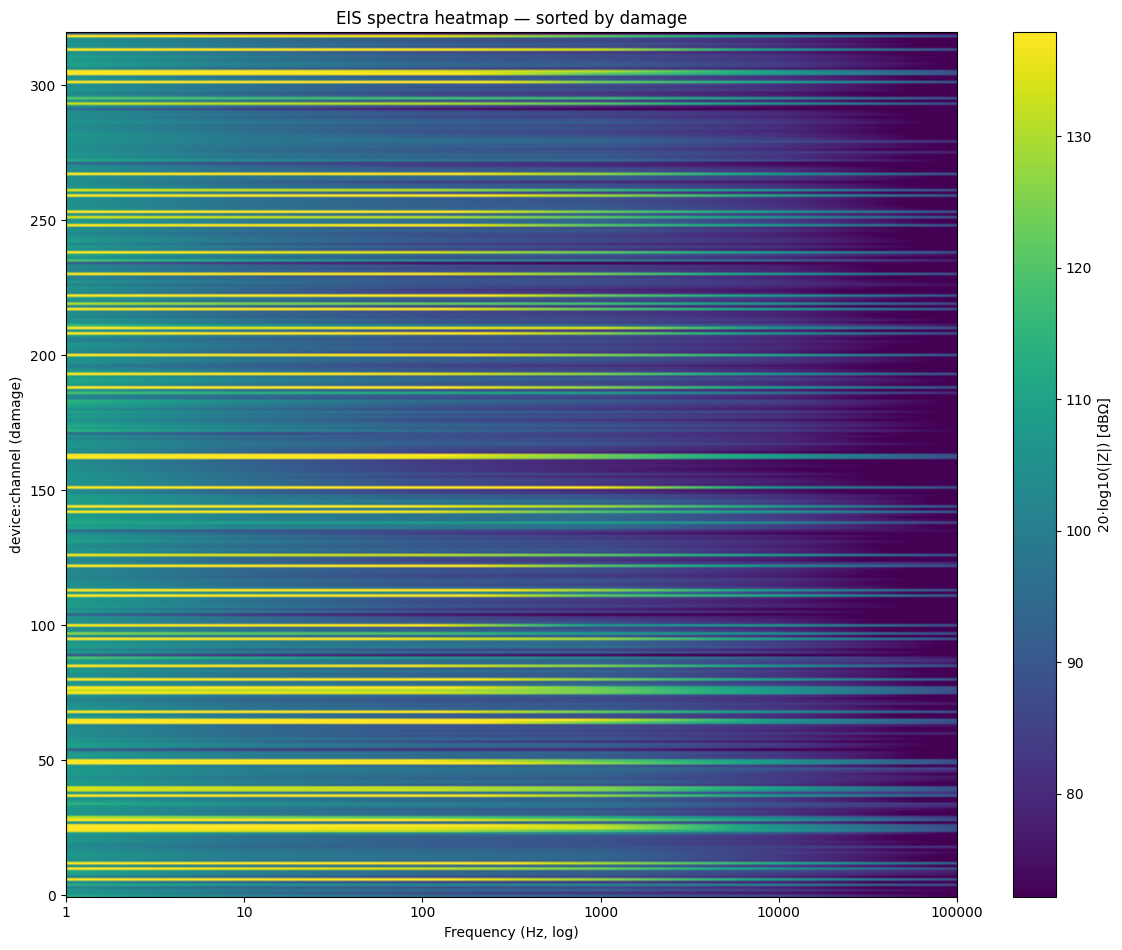

In [31]:
plot_eis_heatmap_across(eis, freq_col="frequency", val_col="z", sort_desc=False)

In [32]:
mask = np.isclose(eis["damage"], 10)
eis_no10_damage = eis#[~mask]

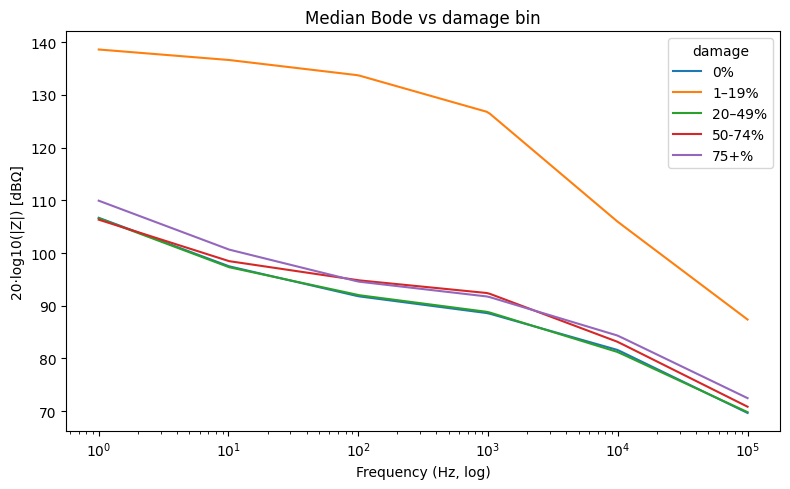

In [33]:
plot_bode_by_damage_bins(
    eis_no10_damage, 
    freq_col="frequency", 
    val_col="z", 
    bins=(0, 1, 20, 50, 75, 101),
    labels=("0", "1–19", "20–49", "50-74", "75+"),
)

[devN09] channel order:       [24, 29, 23, 17]
[devN09] channel order (1Hz): [24, 23, 17, 29]
[devN10] channel order:       [29, 14, 24, 12]
[devN10] channel order (1Hz): [14, 29, 24, 12]


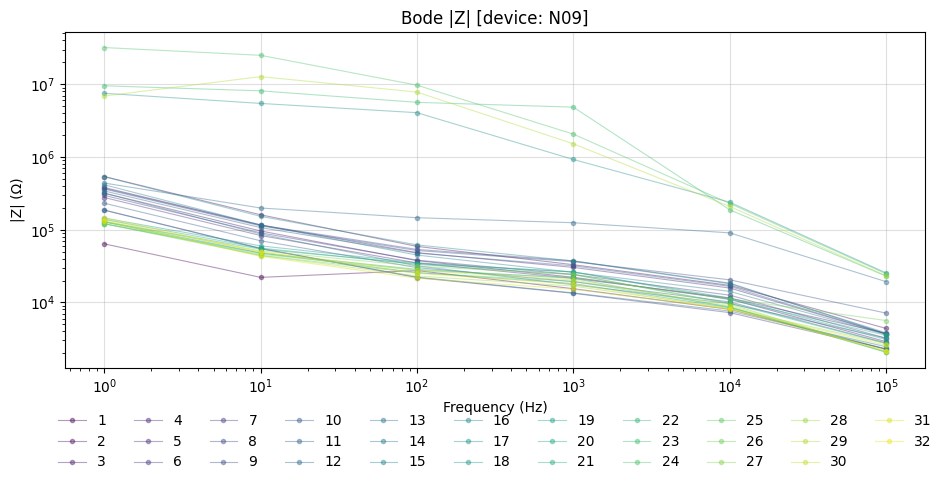

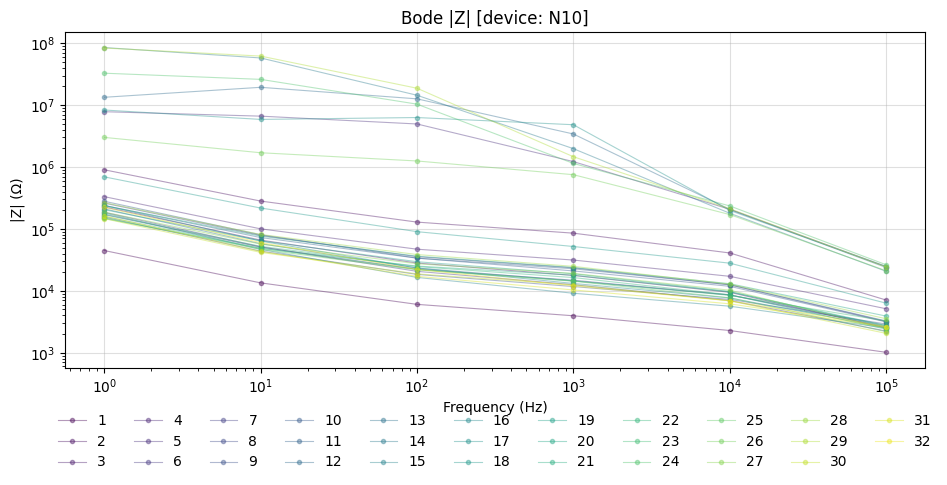

In [34]:
plot_device(eis, "N09", figsize=(10, 5))
plot_device(eis, "N10", figsize=(10, 5))

In [35]:
eis, cv, lsv = parse('./data/data.pssession')

Parsed 2 EIS measurements
Parsed 2 LSV measurements
Parsed 2 CV measurements


In [36]:
eis

,title,date,measurement_id,channel,sweep_id,idc,frequency,zre,zim,z,phase,c,cre,cim
0,Impedance Spectroscopy,2025-08-27 16:36:06.279240,5233ea00,1,2064d495,-16689.300537,1000000.000000,7.219025e+03,7.495938e+03,1.040689e+04,46.078091,2.123216e-11,1.101549e-11,1.060856e-11
1,Impedance Spectroscopy,2025-08-27 16:36:06.279240,5233ea00,1,2064d495,-2384.185791,316227.781250,1.546442e+04,3.521720e+03,1.586036e+04,12.829200,1.429109e-10,7.046103e-12,3.094054e-11
2,Impedance Spectroscopy,2025-08-27 16:36:06.279240,5233ea00,1,2064d495,2384.185791,100000.000000,1.373302e+04,-1.279716e+03,1.379251e+04,-5.323755,-1.243674e-09,-1.070649e-11,1.148945e-10
3,Impedance Spectroscopy,2025-08-27 16:36:06.279240,5233ea00,1,2064d495,-1358.985901,31622.777344,1.200468e+04,2.785022e+03,1.232350e+04,13.061266,1.807139e-09,9.229554e-11,3.978346e-10
4,Impedance Spectroscopy,2025-08-27 16:36:06.279240,5233ea00,1,2064d495,-1404.285431,10000.000000,1.476097e+04,9.676528e+03,1.764997e+04,33.246775,1.644753e-09,4.943696e-10,7.541315e-10
5,Impedance Spectroscopy,2025-08-27 16:36:06.279240,5233ea00,1,2064d495,-129.914761,3162.277588,2.643355e+04,2.000734e+04,3.315156e+04,37.121792,2.515537e-09,9.162237e-10,1.210508e-09
6,Impedance Spectroscopy,2025-08-27 16:36:06.279240,5233ea00,1,2064d495,-120.404243,1000.000000,4.905340e+04,7.138996e+03,4.957016e+04,8.280418,2.229374e-08,4.623987e-10,3.177229e-09
7,Impedance Spectroscopy,2025-08-27 16:36:06.279240,5233ea00,1,2064d495,-113.528206,316.227753,5.937674e+04,1.030250e+04,6.026391e+04,9.843428,4.885147e-08,1.427737e-09,8.228524e-09
8,Impedance Spectroscopy,2025-08-27 16:36:06.279240,5233ea00,1,2064d495,-105.703262,100.000000,6.318466e+04,5.383062e+03,6.341356e+04,4.869595,2.956588e-07,2.130518e-09,2.500735e-08
9,Impedance Spectroscopy,2025-08-27 16:36:06.279240,5233ea00,1,2064d495,-103.733917,31.622776,6.542847e+04,3.506588e+03,6.552236e+04,3.067788,1.435276e-06,4.110794e-09,7.670219e-08


In [37]:
session_info = info('./data/20250821 - L3 activation.pssession')

In [38]:
session_info

[{'title': '20250821 - L3 TOP',
  'date': '2025-08-21T17:24:15.177608',
  'measurement_id': 'b8ee6ae3',
  'method_id': 'eis'},
 {'title': '20250821 - L3 TOP ch01-06 -1.2_1.2 50mV/s WIDE WW',
  'date': '2025-08-21T17:35:36.624192',
  'measurement_id': '08f0d93c',
  'method_id': 'cv'},
 {'title': '20250822 - L3 TOP post slow CV',
  'date': '2025-08-22T09:10:49.912496',
  'measurement_id': 'cdbbf1ea',
  'method_id': 'eis'},
 {'title': '20250822 - L3 TOP ch07-10 -0.9_1.2 1V/s medium WW',
  'date': '2025-08-22T09:23:06.399352',
  'measurement_id': '4adfd9b1',
  'method_id': 'cv'},
 {'title': '20250822 - L3 TOP post fast CV',
  'date': '2025-08-22T10:46:02.128536',
  'measurement_id': 'a242efd9',
  'method_id': 'eis'},
 {'title': '20250822 - L3 TOP ch11-13 -1.2_0.0 50mV/s negative W',
  'date': '2025-08-22T11:02:50.345920',
  'measurement_id': 'eba7708f',
  'method_id': 'cv'},
 {'title': '20250822 - L3 TOP post negative CV',
  'date': '2025-08-22T14:50:37.774736',
  'measurement_id': '32bfaa